# 1. Exploring your data

- After finding the questions we want to answer and getting data we must not jump directly to model careation

- we should first explore our data


## (a) One-dimensional data

- having only numbers 

- e.g. number of pages in data-science books in your library

- e.g. daily average of hours each user spends on your website etc.

- first we should compute a few **summary statistics**

- i.e. see how many data points we have, largest and smallest data, the mean and SD.

- Good step is : create a <u> histogram </u> -- create discrete buckets and count how many points fall into each bucket

In [1]:
from typing import List, Dict
from collections import Counter
import matplotlib.pyplot as plt
import math

def bucketize(point: float, bucket_size: float)-> float:
    """floor the point to the next lower multiple of bucket_size"""
    return bucket_size*math.floor(point/bucket_size)

assert bucketize(17,5) == 15

# The point is 17.0.
# The bucket_size is 5.0.
# The bucketize() function calculates the floor of point / bucket_size, which is 17.0 / 5.0 = 3.4. The floor of 3.4 is 3.
# Then, it multiplies this floor value by bucket_size, which is 3 * 5.0 = 15.0.
# So, the result of bucketize(17.0, 5.0) is 15.0, which is the next lower multiple of bucket_size for the given point.

In [2]:
assert bucketize(17,10) == 10

In [3]:
def make_histogram(points: List[float], bucket_size: float) -> Dict[float, int]:
    """Count number of points in each bucket"""
    return Counter(bucketize(point, bucket_size) for point in points)

assert make_histogram([17.0, 20.0, 21.0, 23.0, 24.0, 26.0, 28.0, 30.0], 5.0) == {20.0: 4, 25.0: 2, 15.0: 1, 30.0: 1}

#output indicates: 
#in bucket 15 to 20 is one point,
#20 to 25 is four points and 
#25 to 30 is two points and 
#30 to 35 bucket is one point

In [4]:
# points = [1,2,3,4,5,6]
# make_histogram(points, 5)

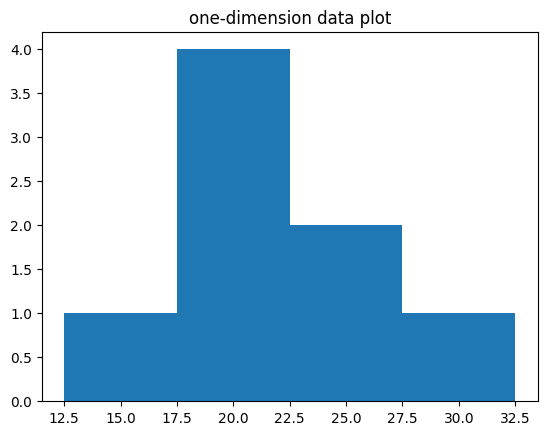

In [5]:
def plot_histogram(points: List[float], bucket_size, title: str = ''):
    histogram = make_histogram(points, bucket_size)
    #print(histogram)
    plt.bar(histogram.keys(), histogram.values(), width = bucket_size)
    plt.title(title)

plot_histogram([17.0, 20.0, 21.0, 23.0, 24.0, 26.0, 28.0, 30.0], 5, 'one-dimension data plot')

([<matplotlib.axis.XTick at 0x10f640d90>,
 [Text(15, 0, '15'), Text(20, 0, '20'), Text(25, 0, '25'), Text(30, 0, '30')])

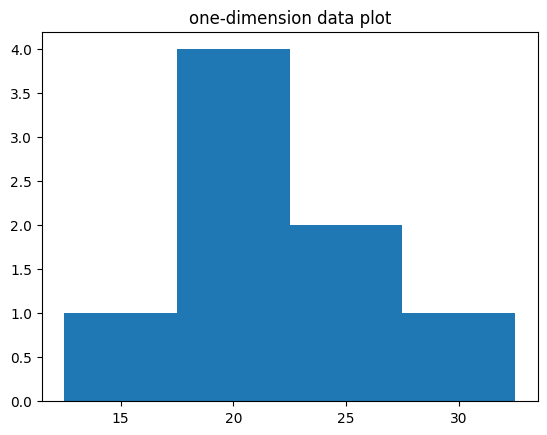

In [6]:
plot_histogram([17.0, 20.0, 21.0, 23.0, 24.0, 26.0, 28.0, 30.0], 5, 'one-dimension data plot')

#set x_ticks
plt.locator_params(axis='x', nbins=5)

#or set x_ticks using array
plt.xticks([15, 20, 25, 30])


### Example -- same mean and SD but different plots

In [7]:
import random
from scratch.probability import inverse_normal_cdf
from scratch.statistics import mean, standard_deviation

random.seed(0)

#Data1: generate 10000 numbers between 100 and -100
uniform = [200 * random.random() - 100 for _ in range(10000)]
print(mean(uniform), standard_deviation(uniform))

#Data2: generate a CDF of mean 0 and SD 58
#CDF = mean+ SD*StandardCDF 
normal = [57 * inverse_normal_cdf(random.random()) for _ in range(10000)]
print(mean(normal), standard_deviation(normal))

0.1316885523130605 57.556430007559875
0.1411157913208008 57.39097856770662


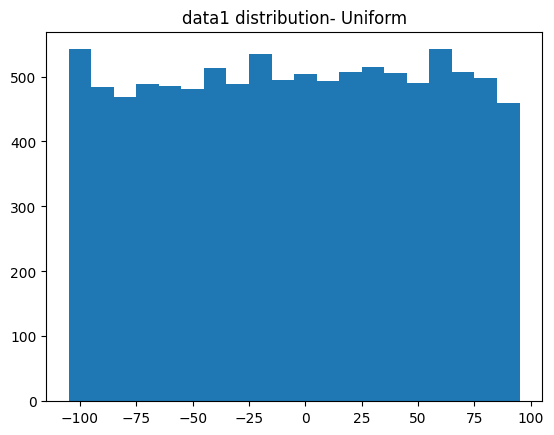

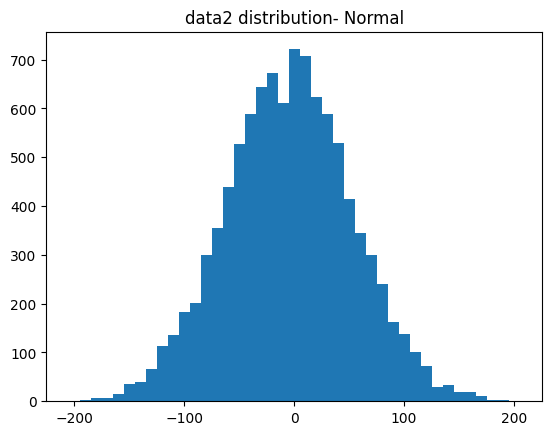

In [8]:
#both have same mean and SD but lets see the distribution of data
from matplotlib import pyplot as plt
plot_histogram(uniform, 10, 'data1 distribution- Uniform')
plt.show()
plot_histogram(normal, 10, 'data2 distribution- Normal')
        

- In the above two cases the two distributions have a pretty different max and min, but even knowing that wouldn’t have been sufficient to understand how they differed.

## (b) Two-dimensional data

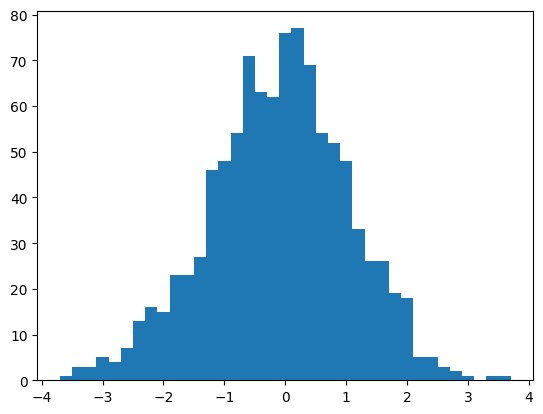

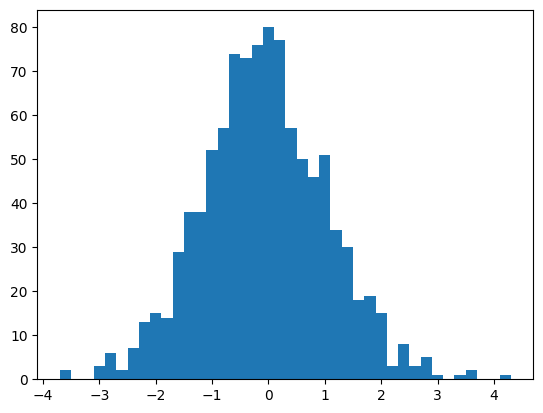

In [9]:
#data 1
random.seed(0)
def random_normal() -> float:
    return inverse_normal_cdf(random.random())    

xs = [random_normal() for _ in range(1000)]   #set of random numbers                                             
#lets generate two data from xs with same mean and SD and CDF

ys1 = [x + random_normal() / 2 for x in xs]   
ys2 = [-x + random_normal() / 2 for x in xs]   

plot_histogram(ys1, bucket_size=0.2)
plt.show()
plot_histogram(ys2, bucket_size=0.2)
plt.show()

 #x ranges from 3 to -3 therefore bucketsize is small

In [10]:
print(mean(ys1), mean(ys2))   # near to 0
print(standard_deviation(ys1), standard_deviation(ys2)) #near 0.5

-0.007686777114868164 0.02784731864929199
1.1434910734911157 1.1060591282472048


- mean and SD for both are similar

- but joint distribution with x would be different, let's see

Text(0.5, 1.0, 'joint distribution of ys wrt xs')

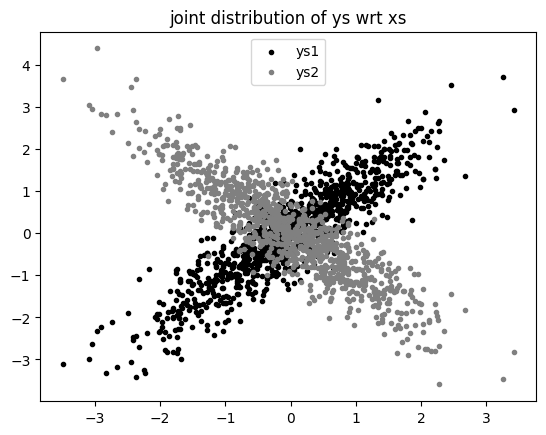

In [11]:
plt.scatter(xs, ys1, c = 'black', marker = '.',label = 'ys1')
plt.scatter(xs, ys2, c = 'grey', marker = '.', label = 'ys2')
plt.legend(loc = "upper center")
plt.title("joint distribution of ys wrt xs")

In [12]:
#lets find correlation - shows how opposite these two data are 
from scratch.statistics import correlation

print(correlation(xs,ys1))
print(correlation(xs,ys2))



0.8929373295753591
-0.8875381382392931


## (c) many dimensions

- in this we would like to know how data from different dimensions relate to each other.

### Approach 1 : correlation matrix
  - one method is to use **correlation matrix** : in which the entry in row i and column j is the correlation between the ith dimension and the jth dimension of the data

In [13]:
from scratch.linear_algebra import Matrix, Vector, make_matrix
from scratch.statistics import correlation

def correlation_matrix(data: List[Vector]) -> Matrix:
    """
    Returns the len(data) x len(data) matrix whose (i, j)-th entry
    is the correlation between data[i] and data[j]
    """
    def correlation_ij(i: int, j: int) -> float:
        return correlation(data[i], data[j])
    return make_matrix(len(data), len(data), correlation_ij)

In [14]:
data = [[1, 2, 33], [4, 5, 96], [7, 18, 9]] 
correlation_matrix(data)

[[0.9999999999999998, 0.9998376176990331, -0.31893849103756877],
 [0.9998376176990331, 1.0, -0.33596608305338355],
 [-0.31893849103756877, -0.33596608305338355, 1.0]]

In [15]:
data = [[1, 33], [4, 96], [7, 9]] 
correlation_matrix(data)

[[0.9999999999999998, 1.0, 0.9999999999999998],
 [1.0, 1.0, 1.0],
 [0.9999999999999998, 1.0, 0.9999999999999998]]

### Approach 2 : scatter subplots
- use scatter plot if there are not many dimensions

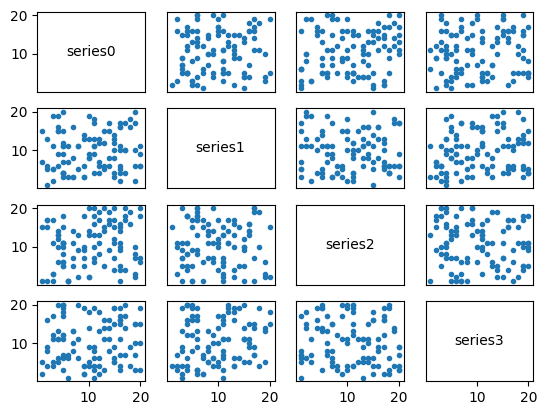

In [16]:
#assume corr_data which is a List of 4 Vectors of 100-dimension each

corr_data = [[random.randint(1,20) for _ in range(100)]
             for _ in range(4)]

num_vectors = len(corr_data)
fig, ax = plt.subplots(num_vectors,num_vectors) #containers to store figs and axes object location

for i in range(num_vectors):
    for j in range(num_vectors):

        # scatter column_j on x-axis vs row_i on y-axis
        if i != j: ax[i][j].scatter(corr_data[j], corr_data[i], marker = '.')

        # unless i == j, in which case show the series name (annotate)
        else: ax[i][j].annotate("series" + str(i), (0.5,0.5),
                                xycoords = 'axes fraction',
                                ha = "center", va = "center")
        #then hide axis labels except for left and bottom axis
        if i < num_vectors - 1: ax[i][j].xaxis.set_visible(False)
        if j > 0: ax[i][j].yaxis.set_visible(False) 

        # Fix the bottom-right and top-left axis labels, which are wrong because
        # their charts only have text in them
        ax[-1][-1].set_xlim(ax[0][-1].get_xlim())
        ax[0][0].set_ylim(ax[0][1].get_ylim())
plt.show()


- when we will have valid correlated data we can visualize the correlation between each vector in subplots

- This is a quick way to get a rough sense of which of your variables are correlated (unless you spend hours tweaking matplotlib to display things exactly the way you want them to, in which case it’s not a quick way).


# 2. namedtuple

- A namedtuple is a convenient data structure available in Python's **collections module**

- It's a factory function for **creating tuple subclasses** with named fields.

- Essentially, it allows you to create a **tuple-like object where each field has a name** and **can be accessed both by index and by name**

Here's a simple example:

In [17]:
from collections import namedtuple

#define a nametuple - point, with fields - x and y
point = namedtuple('point', ['x', 'y'])

#create a point object
p = point(0,1)

#access fields using name
print(p.x)
print(p.y)

#access using index
print(p[0])
print(p[1])

#unpack namedtuple
x, y = p
print(x,y)

0
1
0
1
0 1


## (a) namedtuple over dict

- namedtuple are used as an alternative to dict to represent structured data

- why? - drawabacks of dict

1. **Efficiency**: Dictionaries (Dict) in Python have some <u>overhead</u>, so if you have a large amount of data, using dictionaries to store it might consume more memory than necessary. This is because dictionaries have to store key-value pairs, which adds overhead compared to simpler data structures like tuples.

2. **Error-Prone**: Accessing data by dictionary key can be error-prone because misspelling a key won't raise an error but will create a new key-value pair, leading to unexpected behavior. For example, if you mistakenly type 'cosing_price' instead of 'closing_price', Python won't raise an error, but your data will be incorrect.

3. **Type Annotations**: While you can type-annotate dictionaries with simple types, it becomes challenging when you have dictionaries with complex structures or multiple value types. This makes it difficult to leverage Python's type hinting capabilities effectively.

4. **Namedtuples as an Alternative**: Namedtuples provide a <u>structured and immutable way</u> to represent data. They behave like tuples but with named fields, making it easier to access data and less error-prone than using dictionaries.

5. **Type Annotations with Namedtuples**: Namedtuples can be <u>easily type-annotated</u> using the **NamedTuple class from the typing module**. This allows you to specify the types of each field, providing more robust type checking and documentation.

6. **Method Attachments**: Namedtuples can also have methods attached to them, making them more versatile for representing structured data along with associated functionality.

- Overall, namedtuples offer a cleaner and more efficient way to represent structured data compared to dictionaries, <u>especially when working with typed data and requiring immutability</u>.


In [18]:
#lets first try to use dict

import datetime

stock_price = {'closing_price': 102.06, 
               'date': datetime.date(2014, 8, 29),
               'symobol': 'AAPL'}
print(stock_price)

# Dictionaries have some overhead associated with storing key-value pairs 
#and managing hash tables for fast lookup. 
#This means that even for small amounts of data
#dictionaries consume more memory than other data structures like tuples or namedtuples.

#oops, typo
stock_price['cosing price'] = 100 #generates no error prompt while assigns new key:value pair to stock_price

print(stock_price)


{'closing_price': 102.06, 'date': datetime.date(2014, 8, 29), 'symobol': 'AAPL'}
{'closing_price': 102.06, 'date': datetime.date(2014, 8, 29), 'symobol': 'AAPL', 'cosing price': 100}


In [19]:
#type annotation in dict
import datetime

price: Dict['str',float] = {}

#or
price: Dict[datetime.date, float] = {}

#no helpful way to annotate dictionaries-as-data that have lots of different value types
#we loose power of type hint as well

In [20]:
#lets try namedtuple
from collections import namedtuple

StockPrices = namedtuple('StockPrices', ['symbol', 'date', 'closing_price'])

#assign object
prices = StockPrices('MSFT', datetime.date(2014, 8, 29), 102.06)

#access using name
print(prices.closing_price, prices.date, prices.symbol)

#access using index
print(prices[0], prices[1], prices[2])

#unpack namedtuple
symbol, date, closing_price = prices
print(symbol,date,closing_price)


102.06 2014-08-29 MSFT
MSFT 2014-08-29 102.06
MSFT 2014-08-29 102.06


In [21]:
#type annotation in namedtuple

from typing import NamedTuple

class StockPrice(NamedTuple):
    symbol: str
    date: datetime.date
    closing_price: float

    def is_high_tech(self) -> bool:
        """It's a class, so we can add methods too"""
        return self.symbol in ['MSFT', 'GOOG', 'FB', 'AMZN', 'AAPL']

price = StockPrice('MSFT', datetime.date(2018, 12, 14), 106.03)
# price1 = StockPrice('MSF', datetime.date(2018, 12, 14), 106.02)
assert price.is_high_tech() == True
assert price.symbol == 'MSFT'


In [22]:
StockPrice.symbol="h"
print(StockPrice.symbol, price.symbol)

h h


- Very few people use NamedTuple in this way. But they should!

# 3. Dataclass

- Dataclasses are (sort of) a mutable version of NamedTuple.

- why“sort of”? because NamedTuples represent their data compactly as tuples, whereas dataclasses are regular Python classes that simply generate some methods for you automatically.

- The syntax is very similar to NamedTuple. But instead of inheriting from a base class, we use a decorator '@':

In [23]:
from dataclasses import dataclass

@dataclass
class StockPrice2:
    symbol: str
    date: datetime.date
    closing_price: float

    def is_high_tech(self) -> bool:
        """It's a class, so we can add methods too"""
        return self.symbol in ['MSFT', 'GOOG', 'FB', 'AMZN', 'AAPL']

price2 = StockPrice2('MSFT', datetime.date(2018, 12, 14), 106.03)
assert price2.symbol == 'MSFT'
assert price2.closing_price == 106.03
assert price2.is_high_tech()

# # As mentioned, the big difference is that we can modify a dataclass instance’s values:
# # stock split
price2.closing_price /= 2
print(price2.closing_price)


# # It's a regular class, so add new fields however you like!
price2.cosing_price = 75 # oops
print(price2) # not updates price2
print(price2.cosing_price) # but updates a new variable


53.015
StockPrice2(symbol='MSFT', date=datetime.date(2018, 12, 14), closing_price=53.015)
75


In [24]:
from dataclasses import dataclass

@dataclass
class StockPrice2:
    # symbol: str
    # date: datetime.date
    # closing_price: float

    def __init__(self, s, d, c):
        self.symbol = s
        self.date = d
        self.closing_price = c

price1 = StockPrice2('MSFT', datetime.date(2018, 12, 14), 106.03)
price2 = StockPrice2('MSFT', datetime.date(2018, 12, 14), 106.03)

print(price1==price2)


True


- If we tried to modify a field of the NamedTuple version, we’d get an AttributeError.

- This also leaves us susceptible to the kind of errors we were hoping to avoid by not using dicts

- We won’t be using dataclasses, but you may encounter them out in the wild.

# 4. Cleaning and Munging

- Real-world data is dirty. Often you’ll have to do some work on it before you can use it.

  - We have to convert strings to floats or ints before we can use them.

  - We have to check for missing values and outliers and bad data
 
- for reading data from csv file what we did previously in 'Getting data' chapter?:
  - used `closing_price = row[2]`
  

In [25]:
#read tab_delimited_stock_prices.txt
#csv.reader() returns an iterable object that you can loop through to process each row of the file.


import csv

#print each cell of rows with name
def process(date: str, symbol: str, closing_price: float) -> None:
    print(f"date: {date}, symbol: {symbol}, closing price: {closing_price}")

#read file using csv module
with open("tab_delimited_stock_prices.txt") as f:
    tab_reader = csv.reader(f, delimiter = '\t')     #iterator object, can be iterated over rows
    for row in tab_reader:
        date = row[0]
        symbol = row[1]
        closing_price = row[2]
        process(date, symbol, closing_price)

date: 6/20/2014, symbol: AAPL, closing price: 90.91
date: 6/20/2014, symbol: MSFT, closing price: 41.68
date: 6/20/2014, symbol: FB, closing price: 64.5
date: 6/19/2014, symbol: AAPL, closing price: 91.86
date: 6/19/2014, symbol: MSFT, closing price: 41.51
date: 6/19/2014, symbol: FB, closing price: 64.34


- But using a function to parse would be less error-prone, because we can test:

## (a) Parse csv data

In [26]:
from dateutil.parser import parse
from collections import namedtuple

StockPrices = namedtuple('StockPrices', ['symbol', 'date', 'closing_price']) #type annotation for namedtuple


def parse_row(row: List[str]) -> StockPrice: 
    symbol, date, closing_price = row
    return StockPrice(symbol = symbol, 
                      date = date, 
                      closing_price = float(closing_price))

# Now test our function
parse_row(["MSFT", "2018-12-14", "106.03"])

StockPrice(symbol='MSFT', date='2018-12-14', closing_price=106.03)

## (b) Generate None for bad data

- what if there is bad data
  - e.g. in closing_price which should be float is not float?
  - let's check:

In [27]:
parse_row(["MSFT", "2018-12-14", "x"]) #generate error

ValueError: could not convert string to float: 'x'

- It's better to get a None than getting error

- We can use try:except to get None if data does not matches the annotation type

- And use `Optional` type to get either StockPrice type or None type

In [25]:
from typing import Optional # In Optional[T], type will be either T or None
from collections import namedtuple
import re 

StockPrice = namedtuple('StockPrice', ['symbol', 'date', 'closing_price'])
def try_parse_row(row: List[str]) -> Optional[StockPrice]:
    symbol, date_, closing_price_ = row

# Stock symbol should be all capital letters
    if not re.match(r"^[A-Z]+$", symbol):
        return None

    try:
        date = parse(date_).date()
    except ValueError:
        return None

    try:
        closing_price = float(closing_price_)
    except ValueError:
        return None

    return StockPrice(symbol, date, closing_price)

# should return None for errors
assert try_parse_row(['MSFT0', '2018-12-14', '103.2']) == None
assert try_parse_row(['MSFT', '2018-12--14', '103.2']) == None
assert try_parse_row(['MSFT', '2018-12-14', 'x']) == None

# but should return same as before when data is good
assert try_parse_row(['MSFT', '2018-12-14', '100.3'])

## (c) Example: comma-delimited text with bad data

- if even one data in a row is bad/wrong as seen above, we want to skip that row

In [33]:
import csv

data: List[StockPrice] = []

with open("comma_delimited_stock_prices.csv") as f:
    reader = csv.reader(f)
    for row in reader:
        maybe_stock = try_parse_row(row)
        if maybe_stock == None:
            print(f"skipping invalid row: {row}")
        else:
            data.append(maybe_stock)

skipping invalid row: ['MSFT', '6/19/2014', 'n/a']


## (d) Handle invalid data
- Generally speaking, the three options are to get rid of them, to go back to the source and try to
fix the bad/missing data, or to do nothing and cross our fingers.

- If there’s one bad row out of millions, it’s probably okay to ignore it.

- But if half your rows have bad data, that’s something you need to fix.
- A good next step is to check for outliers, using techniques from “Exploring Your Data” or by ad hoc investigating.

- For example, did you notice that one of the dates in the stocks file had the year 3014? That won’t (necessarily) give you an error, but it’s quite plainly wrong, and you’ll get screwy results if you don’t catch it.

- Real-world datasets have missing decimal points, extra zeros, typographical errors, and countless other problems that it’s your job to catch. (Maybe it’s not officially your job, but who else is going to do it?)

# 5. Manipulating Data

- its most important skill and does not need a specific technique

- Example of data manipulation:

1. **Imagine we have a data of stock prices for different companies**
   - it has symbol, date, and closing price

In [120]:
#lets create a random csv data file

import csv
from collections import namedtuple
import datetime

StockPrice = namedtuple('StockPrice', ['symbol', 'date', 'closing_price'])

# Create stock price data for two months
data = []

# January data
for day in range(1, 32):
    data.append(StockPrice(symbol='MSFT', date=datetime.date(2018, 1, day), closing_price=round(100 + day * 0.5, 2)))
    data.append(StockPrice(symbol='AAPL', date=datetime.date(2018, 1, day), closing_price=round(150 - day * 0.3, 2)))
    data.append(StockPrice(symbol='GOOG', date=datetime.date(2018, 1, day), closing_price=round(1000 + day * 1.2, 2)))

# February data
for day in range(1, 29):
    data.append(StockPrice(symbol='MSFT', date=datetime.date(2018, 2, day), closing_price=round(105 + day * 0.7, 2)))
    data.append(StockPrice(symbol='AAPL', date=datetime.date(2018, 2, day), closing_price=round(145 - day * 0.5, 2)))
    data.append(StockPrice(symbol='GOOG', date=datetime.date(2018, 2, day), closing_price=round(1020 + day * 1.4, 2)))

# Write the data to a CSV file
with open('data_manipulation_data.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['Symbol', 'Date', 'Closing Price'])
    for stock_price in data:
        writer.writerow([stock_price.symbol, stock_price.date, stock_price.closing_price])

#print(data)

2. **Suppose we want to find the highest ever closing_price of AAPL**

- what will we do?

  (a) extract rows with symbol = AAPL
  (b) grab closing_price form each window
  (c) find maximum closing_price among these

In [137]:
# Extract aapl rows only from data
aapl_row_only = [stock_price for stock_price in data if stock_price.symbol == 'AAPL']
print(aapl_row_only)

# find max price from list of closing prices
max_aapl_price = max([aapl_row.closing_price for aapl_row in aapl_row_only])
print(max_aapl_price)

[StockPrice(symbol='AAPL', date=datetime.date(2018, 1, 1), closing_price=149.7), StockPrice(symbol='AAPL', date=datetime.date(2018, 1, 2), closing_price=149.4), StockPrice(symbol='AAPL', date=datetime.date(2018, 1, 3), closing_price=149.1), StockPrice(symbol='AAPL', date=datetime.date(2018, 1, 4), closing_price=148.8), StockPrice(symbol='AAPL', date=datetime.date(2018, 1, 5), closing_price=148.5), StockPrice(symbol='AAPL', date=datetime.date(2018, 1, 6), closing_price=148.2), StockPrice(symbol='AAPL', date=datetime.date(2018, 1, 7), closing_price=147.9), StockPrice(symbol='AAPL', date=datetime.date(2018, 1, 8), closing_price=147.6), StockPrice(symbol='AAPL', date=datetime.date(2018, 1, 9), closing_price=147.3), StockPrice(symbol='AAPL', date=datetime.date(2018, 1, 10), closing_price=147.0), StockPrice(symbol='AAPL', date=datetime.date(2018, 1, 11), closing_price=146.7), StockPrice(symbol='AAPL', date=datetime.date(2018, 1, 12), closing_price=146.4), StockPrice(symbol='AAPL', date=datet

In [142]:
# in one line

max_aapl_price = max([row.closing_price for row in data if row.symbol == 'AAPL'])
print(max_aapl_price)

149.7


3. **Suppose we want to know highest ever closing_price for each stock**

- steps:
  (a) Create a defaultdict to keep track of each stock's closing price starting from -infinite  
  (b) Iterate over all the rows and update  

In [154]:
# For grouping create dict with default values -infinity for any keys

from collections import defaultdict

group_dict = defaultdict (lambda: float('-inf'))

# print(data)

# Update value of closing price for each key with greater one
for row in data:
    #print(row)
    if group_dict[row.symbol] < row.closing_price:
        group_dict[row.symbol] = row.closing_price
    #print(group_dict)  

print(group_dict)


defaultdict(<function <lambda> at 0x117a0d800>, {'MSFT': 124.6, 'AAPL': 149.7, 'GOOG': 1059.2})


4. **We can now start to ask more complicated things - what are the largest
and smallest one-day percent changes in our dataset**

- steps: for each group --
  (a) order prices by date  
  (b) zip to get (previous, current) pairs  
  (c) find percentage change  
  (d) find min/max  

In [185]:
# Create groups based on symbol
# print(data)
group_dict:Dict[str, List[StockPrice]] = defaultdict(list) # atomatically creates key associated with given value

for row in data:
    group_dict[row.symbol].append(row)

#print(group_dict)



In [184]:
# Order the rows for each group sorted on date
sorted_by_date = {symbol: sorted(row)  for symbol, row in group_dict.items()} # by default sort date because its second after symbol
print(sorted_by_date)

{'MSFT': [StockPrice(symbol='MSFT', date=datetime.date(2018, 1, 1), closing_price=100.5), StockPrice(symbol='MSFT', date=datetime.date(2018, 1, 2), closing_price=101.0), StockPrice(symbol='MSFT', date=datetime.date(2018, 1, 3), closing_price=101.5), StockPrice(symbol='MSFT', date=datetime.date(2018, 1, 4), closing_price=102.0), StockPrice(symbol='MSFT', date=datetime.date(2018, 1, 5), closing_price=102.5), StockPrice(symbol='MSFT', date=datetime.date(2018, 1, 6), closing_price=103.0), StockPrice(symbol='MSFT', date=datetime.date(2018, 1, 7), closing_price=103.5), StockPrice(symbol='MSFT', date=datetime.date(2018, 1, 8), closing_price=104.0), StockPrice(symbol='MSFT', date=datetime.date(2018, 1, 9), closing_price=104.5), StockPrice(symbol='MSFT', date=datetime.date(2018, 1, 10), closing_price=105.0), StockPrice(symbol='MSFT', date=datetime.date(2018, 1, 11), closing_price=105.5), StockPrice(symbol='MSFT', date=datetime.date(2018, 1, 12), closing_price=106.0), StockPrice(symbol='MSFT', d

In [246]:
# Compute day over day changes sequence

def pct_change(today: StockPrice, yesterday: StockPrice) -> float:
    return (today.closing_price/yesterday.closing_price) - 1

class Dailychange(NamedTuple):
    symbol: str
    date: datetime.date
    pct_change: float

# For one ordered stock
def day_over_day_changes(prices: List[StockPrice]) -> List[DailyChange]:
    """
    Assumes prices are for one stock and are in order
    """
    return [Dailychange(symbol = today.symbol, 
                        date = today.date, 
                        pct_change = pct_change(today, yesterday)) for today, yesterday in zip(prices[1:], prices)]



In [248]:
prices = sorted_by_date['MSFT']
day_over_day_changes(prices)

[Dailychange(symbol='MSFT', date=datetime.date(2018, 1, 2), pct_change=0.004975124378109541),
 Dailychange(symbol='MSFT', date=datetime.date(2018, 1, 3), pct_change=0.004950495049504955),
 Dailychange(symbol='MSFT', date=datetime.date(2018, 1, 4), pct_change=0.0049261083743843415),
 Dailychange(symbol='MSFT', date=datetime.date(2018, 1, 5), pct_change=0.004901960784313708),
 Dailychange(symbol='MSFT', date=datetime.date(2018, 1, 6), pct_change=0.004878048780487809),
 Dailychange(symbol='MSFT', date=datetime.date(2018, 1, 7), pct_change=0.004854368932038833),
 Dailychange(symbol='MSFT', date=datetime.date(2018, 1, 8), pct_change=0.004830917874396157),
 Dailychange(symbol='MSFT', date=datetime.date(2018, 1, 9), pct_change=0.004807692307692291),
 Dailychange(symbol='MSFT', date=datetime.date(2018, 1, 10), pct_change=0.004784688995215225),
 Dailychange(symbol='MSFT', date=datetime.date(2018, 1, 11), pct_change=0.004761904761904745),
 Dailychange(symbol='MSFT', date=datetime.date(2018, 1, 1

In [251]:
# Collect day to day chnages for all symbols
all_changes = [change 
               for symbol_prices in sorted_by_date.values()
               for change in day_over_day_changes(symbol_prices)]
all_changes

[Dailychange(symbol='MSFT', date=datetime.date(2018, 1, 2), pct_change=0.004975124378109541),
 Dailychange(symbol='MSFT', date=datetime.date(2018, 1, 3), pct_change=0.004950495049504955),
 Dailychange(symbol='MSFT', date=datetime.date(2018, 1, 4), pct_change=0.0049261083743843415),
 Dailychange(symbol='MSFT', date=datetime.date(2018, 1, 5), pct_change=0.004901960784313708),
 Dailychange(symbol='MSFT', date=datetime.date(2018, 1, 6), pct_change=0.004878048780487809),
 Dailychange(symbol='MSFT', date=datetime.date(2018, 1, 7), pct_change=0.004854368932038833),
 Dailychange(symbol='MSFT', date=datetime.date(2018, 1, 8), pct_change=0.004830917874396157),
 Dailychange(symbol='MSFT', date=datetime.date(2018, 1, 9), pct_change=0.004807692307692291),
 Dailychange(symbol='MSFT', date=datetime.date(2018, 1, 10), pct_change=0.004784688995215225),
 Dailychange(symbol='MSFT', date=datetime.date(2018, 1, 11), pct_change=0.004761904761904745),
 Dailychange(symbol='MSFT', date=datetime.date(2018, 1, 1

In [267]:
# Find highest ever closing price 

max_change = max(all_changes, key = lambda x: x.pct_change) # all_changes element with max pct_change 
print(max_change)
print(max_change.symbol)
print(max_change.date)
print(max_change.pct_change)

Dailychange(symbol='AAPL', date=datetime.date(2018, 2, 1), pct_change=0.027007818052594335)
AAPL
2018-02-01
0.027007818052594335


In [269]:
# Find min ever closing price
min_change = min(all_changes, key = lambda x: x.pct_change)
print(min_change)
print(min_change.symbol)
print(min_change.date)
print(min_change.pct_change)

Dailychange(symbol='MSFT', date=datetime.date(2018, 2, 1), pct_change=-0.08484848484848484)
MSFT
2018-02-01
-0.08484848484848484


4. **Find which month is best for investment**

steps:  
(a) find avg of pct_chnage for each month  
(b) the month which shows max avg pct_change is best for investment


In [270]:
all_changes

[Dailychange(symbol='MSFT', date=datetime.date(2018, 1, 2), pct_change=0.004975124378109541),
 Dailychange(symbol='MSFT', date=datetime.date(2018, 1, 3), pct_change=0.004950495049504955),
 Dailychange(symbol='MSFT', date=datetime.date(2018, 1, 4), pct_change=0.0049261083743843415),
 Dailychange(symbol='MSFT', date=datetime.date(2018, 1, 5), pct_change=0.004901960784313708),
 Dailychange(symbol='MSFT', date=datetime.date(2018, 1, 6), pct_change=0.004878048780487809),
 Dailychange(symbol='MSFT', date=datetime.date(2018, 1, 7), pct_change=0.004854368932038833),
 Dailychange(symbol='MSFT', date=datetime.date(2018, 1, 8), pct_change=0.004830917874396157),
 Dailychange(symbol='MSFT', date=datetime.date(2018, 1, 9), pct_change=0.004807692307692291),
 Dailychange(symbol='MSFT', date=datetime.date(2018, 1, 10), pct_change=0.004784688995215225),
 Dailychange(symbol='MSFT', date=datetime.date(2018, 1, 11), pct_change=0.004761904761904745),
 Dailychange(symbol='MSFT', date=datetime.date(2018, 1, 1

In [277]:
# group changes by month

# Create empty dict for all months
changes_by_month: List[Dailychange] = {month: [] for month in range(1,3)} # we have only two months data
print(changes_by_month)

{1: [], 2: []}


In [278]:
#append values in list for corresponding month

for row in all_changes:
    changes_by_month[row.date.month].append(row)

print(changes_by_month)

{1: [Dailychange(symbol='MSFT', date=datetime.date(2018, 1, 2), pct_change=0.004975124378109541), Dailychange(symbol='MSFT', date=datetime.date(2018, 1, 3), pct_change=0.004950495049504955), Dailychange(symbol='MSFT', date=datetime.date(2018, 1, 4), pct_change=0.0049261083743843415), Dailychange(symbol='MSFT', date=datetime.date(2018, 1, 5), pct_change=0.004901960784313708), Dailychange(symbol='MSFT', date=datetime.date(2018, 1, 6), pct_change=0.004878048780487809), Dailychange(symbol='MSFT', date=datetime.date(2018, 1, 7), pct_change=0.004854368932038833), Dailychange(symbol='MSFT', date=datetime.date(2018, 1, 8), pct_change=0.004830917874396157), Dailychange(symbol='MSFT', date=datetime.date(2018, 1, 9), pct_change=0.004807692307692291), Dailychange(symbol='MSFT', date=datetime.date(2018, 1, 10), pct_change=0.004784688995215225), Dailychange(symbol='MSFT', date=datetime.date(2018, 1, 11), pct_change=0.004761904761904745), Dailychange(symbol='MSFT', date=datetime.date(2018, 1, 12), pc

In [307]:
# Find average change for each month

avg_daily_change = {month: sum(row.pct_change for row in changes)/len(changes)
                    for month, changes in changes_by_month.items()
                   }
print(avg_daily_change)

max(avg_daily_change, key = avg_daily_change.get)  # january is the best month out of two


{1: 0.0012538154293909563, 2: 0.000361822054727426}


1

# 6. Rescaling / Standardization / z-score normalization
- Many techniques are sensitive to the scale of our data

- you have a dataset consisting of the heights and weights of hundreds of data scientists, and that you are trying to identify clusters of body sizes.

- Intuitively, we’d like clusters to represent points near each other, which means that we need some notion of distance between points.

- We already have a **Euclidean distance function**, so a natural approach might be to treat (height, weight) pairs as points in two-dimensional space.

- Consider the people as follows:


| Person | Height (inches) | Height (centimeters) | Weight (pounds) |
|--------|------------------|----------------------|------------------|
| A      | 63               | 160                  | 150              |
| B      | 67               | 170.2                | 160              |
| C      | 70               | 177.8                | 171              |


- if we measure height in inches, B's nearest point will be A
- if we meausre height in cm, B's nearest point will be C

In [320]:
from scratch.linear_algebra import distance

# Height in inches
a_to_b_inches = distance([63,150], [67,160]) 
a_to_c_inches = distance([63,150], [70,171])
b_to_c_inches = distance([67,160], [70,171])

#Height in cm

a_to_b_cm = distance([160,150], [170.2,160])
a_to_c_cm = distance([160,150], [177.8,171])
b_to_c_cm = distance([170.2,160], [177.8,171])

print(f"in inches: {a_to_b_inches= },{a_to_c_inches= },{b_to_c_inches= }")
print(f"in cm : {a_to_b_cm= },{a_to_c_cm= },{b_to_c_cm= }")


in inches: a_to_b_inches= 10.770329614269007,a_to_c_inches= 22.135943621178654,b_to_c_inches= 11.40175425099138
in cm : a_to_b_cm= 14.284257068535268,a_to_c_cm= 27.52889391167034,b_to_c_cm= 13.370115930686627


- b is nearest to a in inches
- b is nearest to c in cm

- when dimensions aren’t comparable with one another, we will sometimes rescale our data so that each dimension has mean 0 and standard deviation 1.

- This effectively gets rid of the units, converting each dimension to **“standard deviations from the mean”**

## How to do rescaling?

To perform this rescaling, you subtract the mean of each feature from the original values and then divide by the standard deviation of each feature.

Here's the formula: $$ z = \frac{x - \mu}{\sigma}$$
Where:  
z is the standardized value,  
x is the original value,   
μ is the mean of the feature,   
σ is the standard deviation of the feature.  

### Example -- Rescaling with Mean = 0 and SD = 1

Consider a dataset with two features: height (in inches) and weight (in pounds). We'll perform rescaling to standardize the data with mean = 0 and standard deviation = 1.

#### Example Dataset:

| Person | Height (inches) | Weight (pounds) |
|--------|------------------|------------------|
| A      | 63               | 150              |
| B      | 67               | 160              |
| C      | 70               | 171              |

#### Steps:

1. **Calculate Mean and Standard Deviation:**
   - Mean of height: \(66.67\)
   - Mean of weight: \(160.33\)
   - Standard deviation of height: \(2.52\)
   - Standard deviation of weight: \(8.15\)

2. **Rescale Each Data Point:**
   - For each data point:
     - Standardized height: $(\frac{{x - \mu}}{{\sigma}})$
     - Standardized weight: $(\frac{{x - \mu}}{{\sigma}})$

3. **Result:**
   - After rescaling, each feature has a mean of approximately \(0\) and a standard deviation of approximately \(1\).

#### Rescaled Data:

| Person | Standardized Height | Standardized Weight |
|--------|----------------------|---------------------|
| A      | -1.43                | -1.27               |
| B      | 0.16                 | -0.04               |
| C      | 1.31                 | 1.31                |

Rescaling data in this way can be useful for certain machine learning tasks, particularly those where algorithms are sensitive to the scale of the features.


In [370]:
from scratch.statistics import standard_deviation
from scratch.linear_algebra import vector_mean

data = [[63, 150],[67, 160],[70,171]] # height and weight of A, B, C

mean_vector = vector_mean(data)

std_vector = [standard_deviation([element[i] for element in data]) for i in range(len(data[0]))]

print(f"{data =}")
print(f"{mean_vector = } \n {std_vector = }")

#new_data[0] = data[0][0]-mean_vector[0]/std_vector[0] , data[1][0]-mean_vector[0],....

new_data = [(vector[i]-mean_vector[i])/std_vector[i]for vector in data for i in range(len(data[0]))]
    
new_data

data =[[63, 150], [67, 160], [70, 171]]
mean_vector = [66.66666666666666, 160.33333333333331] 
 std_vector = [2.6874192494328497, 8.517954892787092]


[-1.3643820804812896,
 -1.2131237443019878,
 0.12403473458921199,
 -0.03913302400973939,
 1.2403473458920882,
 1.2522567683117338]

In [1]:
#write a function for rescaling

from scratch.linear_algebra import vector_mean
from scratch.statistics import standard_deviation
import math
from typing import Tuple, List
Vector = List[float]

def scale(data: List[Vector]) -> Tuple[Vector, Vector]:
    """
    returns the mean and standard deviation for each position
    """
    dim = len(data[0])
    means = vector_mean(data)
    stdevs = [standard_deviation([vector[i] for vector in data])
              for i in range(dim)]
    return means, stdevs

# We can then use them to create a new dataset:

def rescale(data: List[Vector]) -> List[Vector]:
    """
    Rescales the input data so that each position has
    mean 0 and standard deviation 1. (Leaves a position
    as is if its standard deviation is 0.)
    """
    dim = len(data[0])
    means, stdevs = scale(data)
    
    # Make a copy of each vector
    rescaled = [v[:] for v in data] 
    for v in rescaled:
        for i in range(dim):
            if stdevs[i] > 0:
                v[i] = (v[i] - means[i]) / stdevs[i]
                return rescaled

# 7. tqdm
- tqdm is a Python library that provides a fast, extensible progress bar for loops and iterable objects.

- Its primary purpose is to add a visual indicator to show the progress of an operation, which can be particularly useful for long-running tasks or loops where you want to monitor the progress.

- To start with, you’ll need to install it:  
`python -m pip install tqdm`

- Features:
  1. **iterable wrapped in tqdm.tqdm will produce a progress bar:**

In [30]:
from tqdm import tqdm
import random


for i in tqdm(range(100)):
    # do something slow
    _ = [random.random() for _ in range(1000000)]

100%|█████████████████████████████████████████| 100/100 [00:03<00:00, 28.68it/s]


- In particular, it shows you what fraction of your loop is done ,how long it’s been running, and how
long it expects to run.

- though it can’t do this if you use a generator

2. **You can also set the description of the progress bar while it’s running.**

In [40]:
from typing import List

def primes_up_to(n: int) -> List[int]:
    primes = [2]
    
    with tqdm(range(3, n)) as t:
        for i in t:
            # i is prime if no smaller prime divides it
            i_is_prime = not any(i % p == 0 for p in primes)
            if i_is_prime:
                primes.append(i)
            t.set_description(f"{len(primes)} primes")
    return primes

my_primes = primes_up_to(100000)

429 primes:   3%|▋                       | 2686/99997 [00:01<00:32, 2962.31it/s]IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)

1592 primes:  13%|██▉                   | 13359/99997 [00:04<00:31, 2781.18it/s]IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)

2633 primes:  23%|█████▏                | 23447/99997 [00:07<00:25, 2959.28it/s]IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashin

In [43]:
print(my_primes[:5], my_primes[-5:])

[2, 3, 5, 7, 11] [99929, 99961, 99971, 99989, 99991]


# 8. Dimensionality Reduction

-  Dimensionality reduction is the process of reducing the number of random variables under consideration by obtaining a set of principal variables.

-  It can be used to simplify data for analysis, visualization, and model training.

-  There are two main approaches to dimensionality reduction:

1. **Feature Selection**: This approach selects a subset of the original features while preserving the most relevant information.
   - It discards irrelevant or redundant features, reducing the dimensionality of the dataset.

3. **Feature Extraction**: This approach transforms the original features into a lower-dimensional space.
   - It constructs new features (or components) that are linear or nonlinear combinations of the original features.
   - Principal Component Analysis (PCA) and t-distributed Stochastic Neighbor Embedding (t-SNE) are common techniques for feature extraction.

- Dimensionality reduction is commonly used in machine learning and data analysis when dealing with high-dimensional datasets to alleviate the curse of dimensionality, improve computational efficiency, and enhance interpretability.
- However, it's important to note that dimensionality reduction may result in information loss, and careful consideration should be given to the trade-offs involved.

e.g. we have 4 datapoints with 3 features:

| Height (cm) | Weight (kg) | Age (years) |
|-------------|-------------|-------------|
| 160         | 55          | 30          |
| 170         | 60          | 35          |
| 165         | 58          | 40          |
| 180         | 70          | 25          |





## Steps for dimensionality reduction


1. **Standardization:** Standardize the features by subtracting the mean and dividing by the standard deviation.
2. **Compute Covariance Matrix:** Compute the covariance matrix of the standardized features.
3. **Eigendecomposition:** Perform eigendecomposition on the covariance matrix to obtain eigenvalues and eigenvectors.
4. **Select Principal Components:** Select a subset of the eigenvectors (principal components) corresponding to the largest eigenvalues.
5. **Projection:** Project the standardized data onto the subspace spanned by the selected principal components.



In [28]:
import numpy as np
from sklearn.decomposition import PCA


X = np.array([[160, 55, 30], [170, 60, 35], [165, 58, 40], [180, 70, 25]])

# Step 1: Standardization
X_standardized = (X - X.mean(axis=0)) / X.std(axis=0)
#print(X_standardized)

# Step 2: Cov matrix
cov_matrix = np.cov(X_standardized, rowvar=False) # covariance matrix of the variables (features) present in col
                                                  # therefore, is rowvar? set to False
                                                  # beacuse, var are in columns
print(cov_matrix)

# Step 3: Eigen decomposition
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print(f"{eigenvalues=}")
print(f"{eigenvectors=}")

# Step 4: Selecting Principal Components

selected_components = eigenvectors # For simplicity, let's select all principal components in this example


# Step 5: Projection
X_reduced = X_standardized.dot(selected_components)
print(f"{X_reduced=}")

# Alternatively we can use sklearn's PCA implementation
pca = PCA(n_components=2)  # You can specify the number of components here
X_reduced_sklearn = pca.fit_transform(X_standardized)
print(f"{X_reduced_sklearn=}")

[[ 1.33333333  1.31120933 -0.70553368]
 [ 1.31120933  1.33333333 -0.82094006]
 [-0.70553368 -0.82094006  1.33333333]]
eigenvalues=array([3.25231898, 0.01452055, 0.73316047])
eigenvectors=array([[-0.60733307, -0.67664426,  0.41629208],
       [-0.62486116,  0.73045073,  0.2756633 ],
       [ 0.49060685,  0.09270532,  0.8664356 ]])
X_reduced=array([[ 1.13747447,  0.01302671, -1.16162586],
       [ 0.2000012 , -0.17023604,  0.42112007],
       [ 1.27145387,  0.11065348,  0.81667772],
       [-2.60892954,  0.04655585, -0.07617193]])
X_reduced_sklearn=array([[-1.13747447,  1.16162586],
       [-0.2000012 , -0.42112007],
       [-1.27145387, -0.81667772],
       [ 2.60892954,  0.07617193]])


In [59]:
# trying rowvar true/false
X = [[1,2,3], [4,5,6]] # 2 obs, 3 vars
cov_true = np.cov(X, rowvar = True)
cov_false = np.cov(X, rowvar = False)
print(cov_true)
print(cov_false)

[[1. 1.]
 [1. 1.]]
[[4.5 4.5 4.5]
 [4.5 4.5 4.5]
 [4.5 4.5 4.5]]


In [90]:
sorted?

Signature: sorted(iterable, /, *, key=None, reverse=False)
Docstring:
Return a new list containing all items from the iterable in ascending order.

A custom key function can be supplied to customize the sort order, and the
reverse flag can be set to request the result in descending order.
Type:      builtin_function_or_method

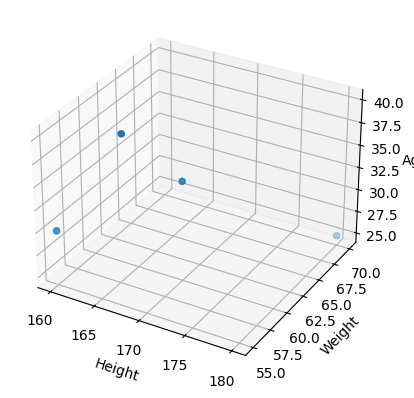

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Data
X = np.array([[160, 55, 30], [170, 60, 35], [165, 58, 40], [180, 70, 25]])

# Create figure and 3D axes
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Extract dimensions
x = X[:, 0]
y = X[:, 1]
z = X[:, 2]

# Plot
ax.scatter(x, y, z)

# Set labels
ax.set_xlabel('Height')
ax.set_ylabel('Weight')
ax.set_zlabel('Age')



# set axis limits
ax.axes.set_xlim3d(left=100, right=200) 
ax.axes.set_ylim3d(bottom=0, top=100) 
ax.axes.set_zlim3d(bottom=0, top=100) 
# Show plot
plt.show()


In [ ]:
# Let's do the PCA without using np/sklearn


from scratch import linear_algebra
import numpy as np
from typing import List
Vector = List[float]

X = np.array([[160, 55, 30], [170, 60, 35], [165, 58, 40], [180, 70, 25]])

# Step 1: Standardization
# If we don’t do this, our techniques are likely to identify the mean itself rather than the variation in the data.
def de_mean(data: List[Vector]) -> List[Vector]:
    """
    Recenters the data to have mean 0 in every dimension
    """
    mean = linear_algebra.vector_mean(data)
    return [linear_algebra.subtract(vector, mean) for vector in data]

# Step 2: determine unit vectors as follows
def direction(w: Vector) -> Vector:
    mag = linear_algebra.magnitude(w)
    return [w_i / mag for w_i in w]

# Step 3(a): compute the variance of dataset in the direction determined by w:
def directional_variance(data: List[Vector], w: Vector) -> float:
    """
    Returns the variance of x in the direction of w
    """
    w_dir = direction(w)
    return sum(linear_algebra.dot(v, w_dir) ** 2 for v in data) 

# Step 3(b): find the direction that maximizes this variance. 
# We can do this using gradient descent, as soon as we have the gradient function
def directional_variance_gradient(data: List[Vector], w: Vector) -> Vector:
    """
    The gradient of directional variance with respect to w
    """
    w_dir = direction(w)
    return [sum(2 * linear_algebra.dot(v, w_dir) * v[i] for v in data)
            for i in range(len(w))]

# Step 4: And now the first principal component that we have is just the direction that 
# maximizes the directional_variance function:
from scratch import gradient_descent
def first_principal_component(data: List[Vector],
                              n: int = 100,
                              step_size: float = 0.1) -> Vector:
    # Start with a random guess
    guess = [1.0 for _ in data[0]]
    with tqdm.tqdm(range(n)) as t:
        for _ in t:
            dv = directional_variance(data,  guess)
            gradient = directional_variance_gradient(data, guess)
            guess = gradient_descent.gradient_step(guess, gradient, step_size)
            t.set_description(f"dv: {dv:.3f}")
            return direction(guess)